In [1]:
from common_functions import *
%pylab inline
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/Users/brunaguedes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['flatten']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
forgetOntology,method,signature = main_execution()

In [4]:
dict_input,dict_output,subclasses = forgetting(forgetOntology,method,signature)

forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#FourCheesesTopping and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#SultanaTopping and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#Giardiniera and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#Pizza and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#OnionTopping and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#ParmesanTopping and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#LaReine and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#SloppyGiuseppe and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#Capricciosa and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.owl#Caprina and generating result
forgetting http://www.co-ode.org/ontologies/pizza/pizza.

In [5]:
def plot_avaxioms_naxioms():
    plot(dict_output['av_axioms'],dict_output['n_axioms'],'o',alpha=0.7)
    xlabel('Average size of axioms', fontsize=16)
    ylabel('Number of axioms', fontsize=16)
    xlim(4,11)
    savefig("FIG_3_no_correlation_avaxioms.png", dpi=500)


def plot_network(degreemax=6): #minimum degree to add label to
    G = network_subclass()
    in_degrees,out_degrees,in_degrees_sorted, out_degrees_sorted = ranking_degree(G)

    labels_less = {}
    for node in G.nodes():
        if G.in_degree(node) > degreemax:
            labels_less[node] = node

    
    node_colors = array([_[1] for _ in in_degrees])
    
    f,axx = subplots(figsize=(60,50))  
    pos = nx.shell_layout(G)
    nx.draw(G,pos,node_size=5000,ax=axx,alpha=0.9,with_labels = False,node_color=node_colors,vmin=0,vmax=74,cmap=cm.Blues)     
    nx.draw_networkx_labels(G,pos,labels_less, font_size=30,font_color='k')
    #create colorbar
    norm = mpl.colors.Normalize(vmin=0, vmax=74)
    cbar = f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm.Blues),
                 ax=axx, orientation='vertical')
    cbar.ax.tick_params(labelsize=40)
    cbar.set_label(label='degree of incoming relations',fontsize=40)
    
    savefig("FIG_4_network_graph.png", rasterized = True)    

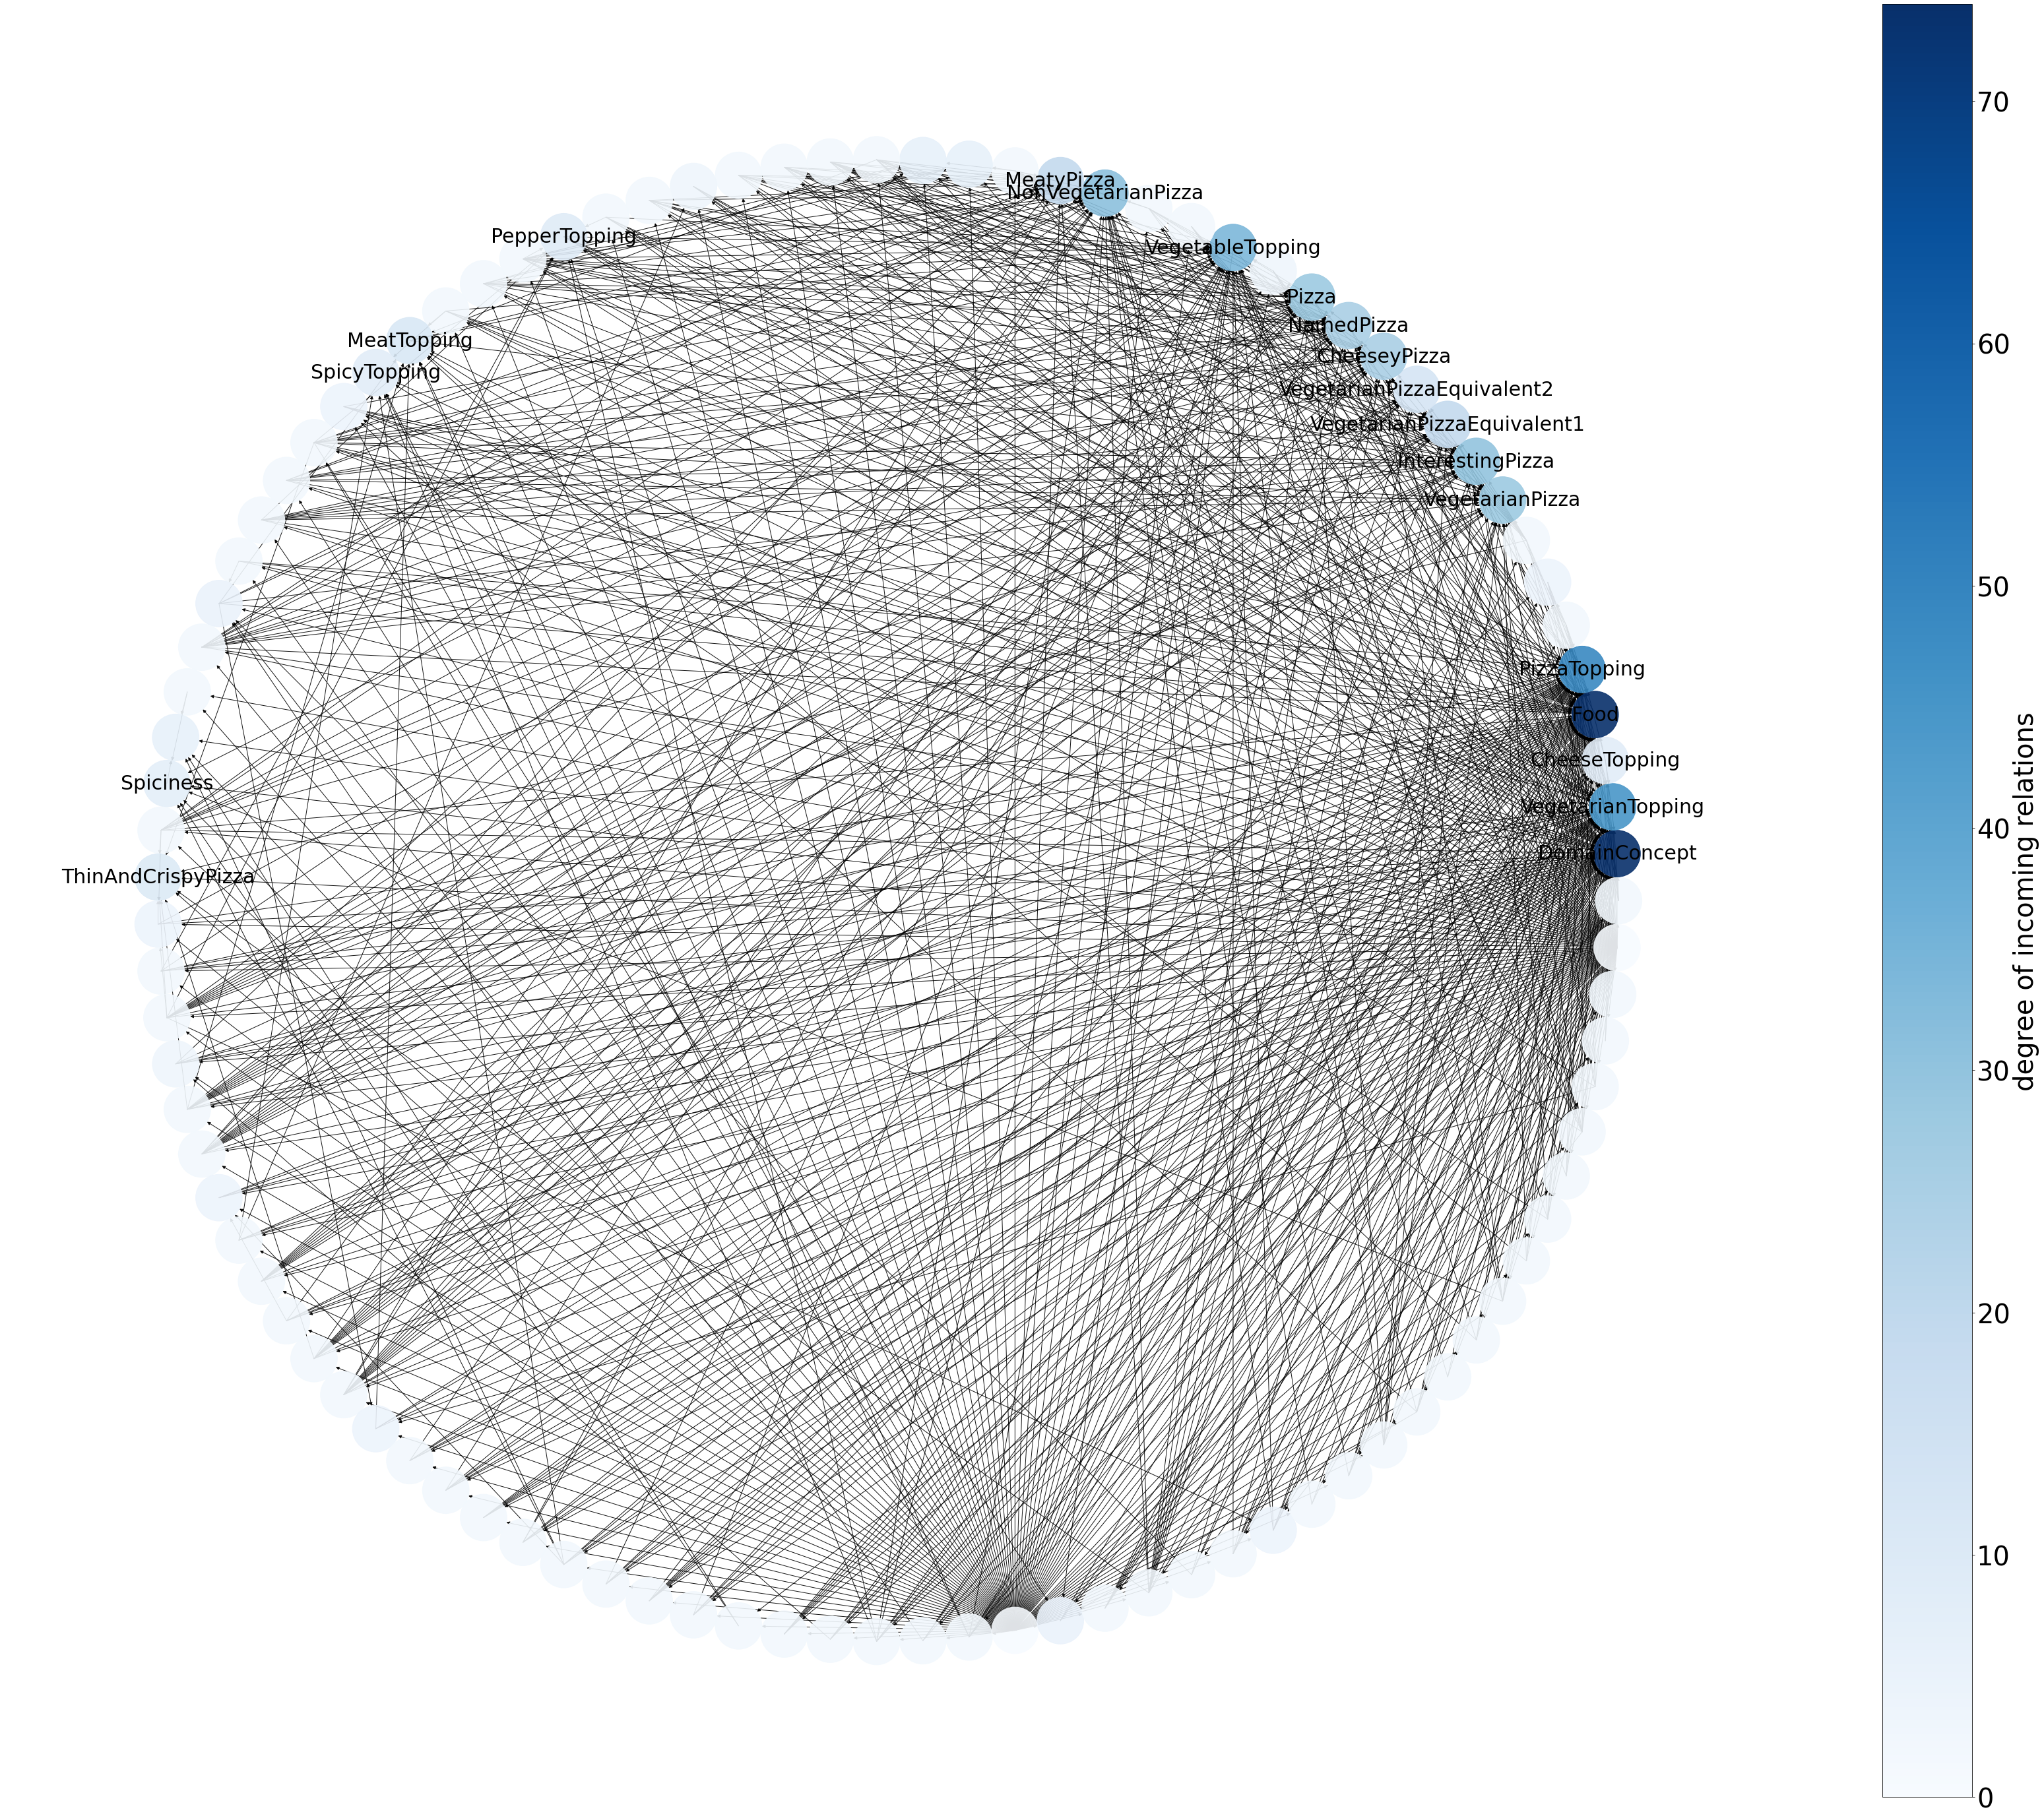

In [6]:
plot_network(degreemax=6)

In [7]:
def plot_indegrees_vs_rationaxioms():
    G = network_subclass()
    subclasses = extract_subclass()
    subclass_clean = [l.split('#')[1] for l in subclasses] 
    #ratio n_axioms and degree of conncetions
    in_degres_ordered_as_n_axioms = [dict(list(G.in_degree(G.nodes())))[sub] for sub in subclass_clean]
    f,axx = subplots(1,1,figsize=(8,5))
    xs = in_degres_ordered_as_n_axioms
    axx.plot(sort(xs), 's' ,label='in degrees')
    axt = axx.twinx()
    axt.plot(array(dict_output['n_axioms'])[argsort(xs)]/array(dict_input['n_axioms']),'o',c='r',label='ratio input/output n_axioms')
    axx.legend(loc='center left', fontsize=14)
    axt.legend(loc='upper left', fontsize=14)
    axx.set_xlabel('classes', fontsize=16)
    axx.set_ylabel('degree of connections - Relations', fontsize=16 )
    axt.set_ylabel('ratio input/output number of axioms', fontsize=16)
    axx.tick_params(axis='both', which='both', labelsize=16)
    axt.tick_params(axis='both', which='both', labelsize=16)
    savefig("FIG_2_indegrees_vs_rationaxioms.png", dpi=500, bbox_inches = "tight")

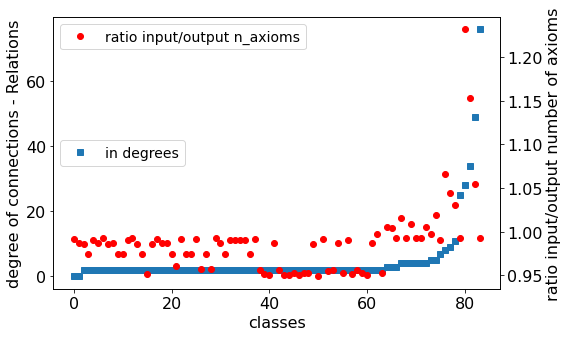

In [8]:
plot_indegrees_vs_rationaxioms()

In [13]:
def plot_lin_fit_indegrees_vs_rationaxioms(): 
    G = network_subclass()
    subclasses = extract_subclass()
    subclass_clean = [l.split('#')[1] for l in subclasses] 
    in_degres_ordered_as_n_axioms = [dict(list(G.in_degree(G.nodes())))[sub] for sub in subclass_clean]
    #linear fit plot
    f,axx = subplots(1,1,figsize=(8,5))
    print(len(in_degres_ordered_as_n_axioms))
    axx.plot(in_degres_ordered_as_n_axioms,dict_output['n_axioms']/array(dict_input['n_axioms']),'o',alpha=0.7)
    axx.set_xlabel('in degrees', fontsize=16)
    axx.set_ylabel('ratio input/output number of axioms', fontsize=16)
    axx.set_xlim(0,12) 
    axx.set_ylim(0.9,1.10)
    axx.tick_params(axis='both', which='both', labelsize=16)

    #linear fit line of lower degree region
    xs = in_degres_ordered_as_n_axioms
    x_to_fit = sort(xs)[0:79]
    y_to_fit = array(dict_output['n_axioms'])[argsort(xs)]/array(dict_input['n_axioms'])
    y_to_fit  = y_to_fit[0:79]
    z = np.polyfit(x_to_fit,y_to_fit, 1)
    plt.plot(x_to_fit,z[0]*x_to_fit + z[1], ls = '-',label=r'$f(x) ='+ str(round(z[0],3))+ 'x +'+ str(round(z[1],3)) +'$')
    print('fitting parameters', z)
    legend()
    savefig("FIG_1_lin_fit_indegrees_vs_rationaxioms.png", dpi=500)

84
fitting parameters [0.0085596  0.95895405]


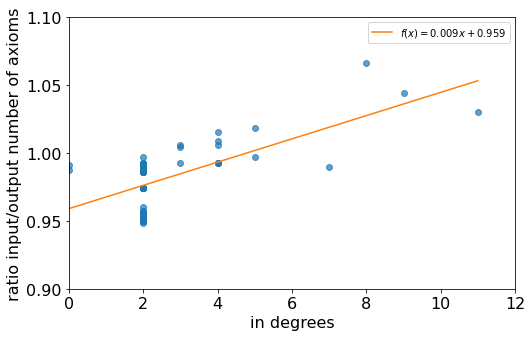

In [14]:
plot_lin_fit_indegrees_vs_rationaxioms()

In [15]:
def plot_outdegrees_vs_rationaxioms():
    #outdegree plot
    G = network_subclass()
    subclasses = extract_subclass()
    subclass_clean = [l.split('#')[1] for l in subclasses]
    out_degres_ordered_as_n_axioms = [dict(list(G.out_degree(G.nodes())))[sub] for sub in subclass_clean]
    f,axx = subplots(1,1,figsize=(8,5))
    xs = out_degres_ordered_as_n_axioms
    axx.plot(sort(xs), 's' ,label='out degrees')
    axt = axx.twinx()
    axt.plot(array(dict_output['n_axioms'])[argsort(xs)]/array(dict_input['n_axioms']),'o',c='r',label='ratio input/output number of axioms')
    axx.legend(loc='upper left')
    axt.legend(loc='upper center')
    axx.set_xlabel('classes')
    axx.set_ylabel('degree')
    f,axx = subplots(1,1,figsize=(8,5))
    axx.plot(out_degres_ordered_as_n_axioms,dict_output['n_axioms']/array(dict_input['n_axioms']),'o',alpha=0.7)
    axx.set_xlabel('out degrees')
    axx.set_ylabel('ratio input/output number of axioms')
    savefig("outdegrees_vs_rationaxioms.png", dpi=500, bbox_inches = "tight")

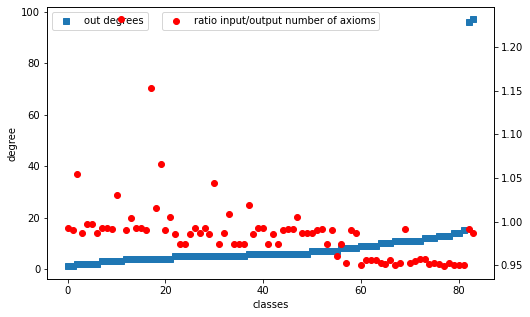

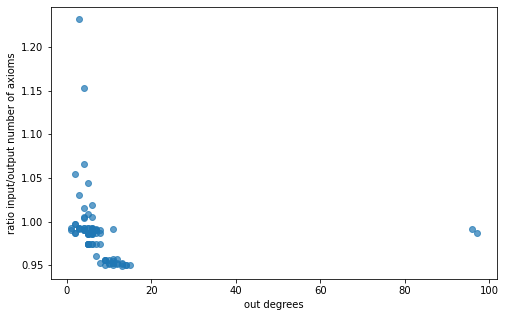

In [16]:
 plot_outdegrees_vs_rationaxioms()

In [17]:
def plot_indegrees_vs_ratioavgaxioms():
    f,axx = subplots(1,1,figsize=(8,5))
    G = network_subclass()
    subclasses = extract_subclass()
    subclass_clean = [l.split('#')[1] for l in subclasses] 
    in_degres_ordered_as_n_axioms = [dict(list(G.in_degree(G.nodes())))[sub] for sub in subclass_clean]
    xs = in_degres_ordered_as_n_axioms
    axx.plot(sort(xs),'s', label='in degrees')
    axt = axx.twinx()
    axt.plot(array(dict_output['av_axioms'])[argsort(xs)], 'o',c='r', label='average number of axioms',)
    axx.legend(loc='upper left', fontsize=16)
    axt.legend(loc='center left', fontsize=16)
    axx.tick_params(axis='both', which='both', labelsize=16)
    axt.tick_params(axis='both', which='both', labelsize=16)
    axx.set_xlabel('classes', fontsize=16)
    axx.set_ylabel('degree of connections - Relations', fontsize=16 )
    axt.set_ylabel('ratio input/output average of axioms', fontsize=16)
    savefig("FIG_7_indegrees_vs_ratioavgaxioms.png", dpi=500, bbox_inches = "tight")

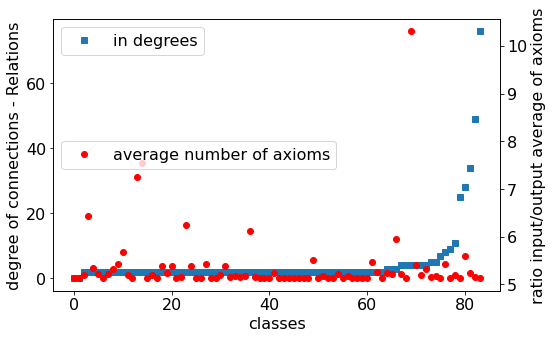

In [18]:
plot_indegrees_vs_ratioavgaxioms()

In [3]:
def plot_forget_multiple():
    G = network_subclass() 
    
    #Calculate in and out degrees of graph
    in_degrees = list(G.in_degree(G.nodes()))
    in_degrees_sorted = array(in_degrees)[array([d[1] for d in in_degrees]).argsort()]
    
    out_degrees = list(G.out_degree(G.nodes()))
    out_degrees_sorted = array(out_degrees)[array([d[1] for d in out_degrees]).argsort()]
    
    #Exclude the ones that are not subclass of anything. See which ones are
    l1 = extract_subclass_class()
    l2 = extract_subclass()
    excluded = [l for l in l1 if l not in l2 if l!='script'] #the ones are not being forgotten
    print('excluded:' + str(excluded))

    #rank subclasses by their in degrees
    classes_ordered_as_indegrees = array(l1)[array([d[1] for d in in_degrees]).argsort()]
    subclasses_to_forget_sorted = [s for s in classes_ordered_as_indegrees if s not in excluded ]
    
    dict_input,dict_output = forgetting_densely(forgetOntology,method,signature,subclasses_to_forget_sorted)
    dict_input,dict_output_mintomax = forgetting_sparsely(forgetOntology,method,signature,subclasses_to_forget_sorted)
    
    figure()
    plot(range(1,10),dict_output['duration'],'o',alpha=0.7)
    xlabel('# of things I forget')
    ylabel('Duration')
    
    figure()
    plot(range(1,10),array(dict_output['n_axioms'])/array(dict_input['n_axioms']),'o',alpha=0.7,label='highly connected')
    plot(range(1,10),array(dict_output_mintomax['n_axioms'])/array(dict_input['n_axioms']),'o',alpha=0.7,label='lowly connected')
    xlabel('Forgetting N signatures')
    ylabel('Ratio n_axioms output/input')
    axhline(1,ls='--',c='r',label='Ratio 1.0')
    legend(loc='best')
    savefig("FIG_6_behavior_after_niterations_ratio.png")
    
    figure()
    plot(range(1,10),array(dict_output['n_axioms']),'o',alpha=0.7,label='highly connected')
    plot(range(1,10),array(dict_output_mintomax['n_axioms']),'o',alpha=0.7,label='lowly connected')
    xlabel('Forgetting N signatures', fontsize=16)
    ylabel('Number of axioms', fontsize=16)

    axhline(699,ls='--',c='r',label='initial n of axioms')
    legend(loc='upper left', fontsize=12)
    savefig("FIG_6_behavior_after_niterations_literal.png")


excluded:['http://www.co-ode.org/ontologies/pizza/pizza.owl#DomainConcept', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#VegetarianTopping', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#VegetarianPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#InterestingPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#VegetarianPizzaEquivalent1', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#VegetarianPizzaEquivalent2', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#CheeseyPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#ThinAndCrispyPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#SpicyTopping', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#NonVegetarianPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#MeatyPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#SpicyPizzaEquivalent', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#SpicyPizza', 'http://www.co-ode.org/ontologies/pizza/pizza.owl#ValuePartition', 'http://www.co-ode.or

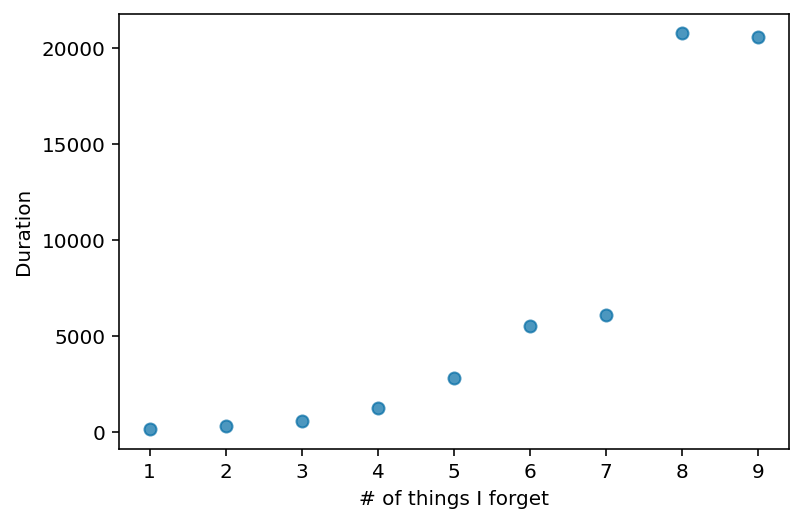

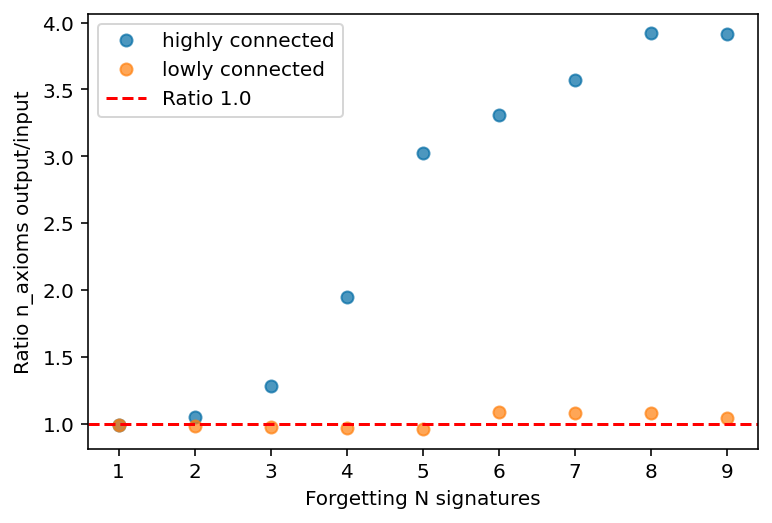

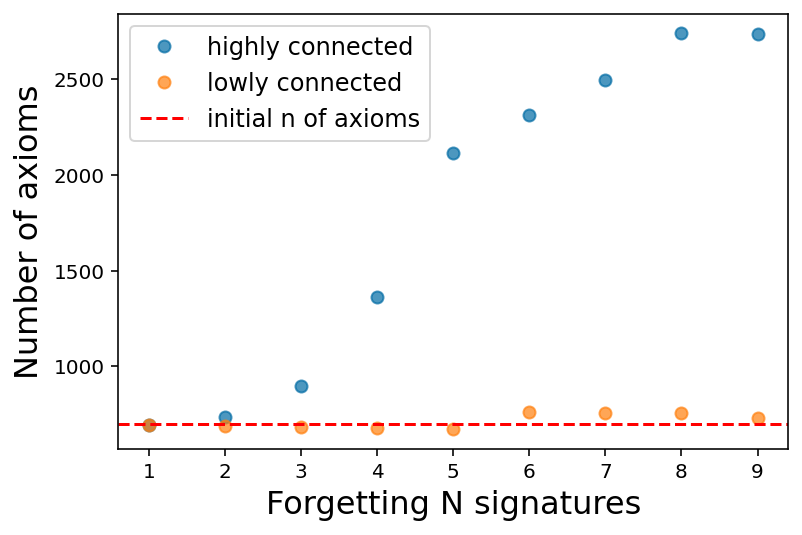

In [4]:
plot_forget_multiple()